<a href="https://colab.research.google.com/github/Sanjeethagadam/FMMLLABS/blob/main/FMML_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

```
Coordinator: Aswin Jose
```

---

In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [21]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart (3).csv


In [22]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
data.shape

(303, 14)

In [24]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [25]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [26]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

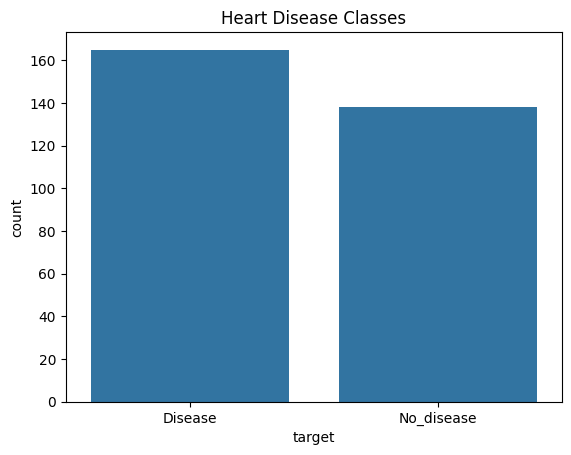

In [27]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

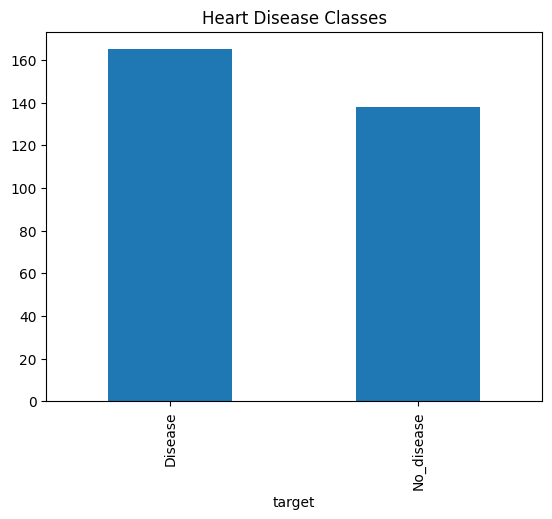

In [28]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with a column 'Sex'
# Example:
# df = pd.read_csv("your_dataset.csv")

# Count the number of participants by sex
sex_count = df['Sex'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_count.index, y=sex_count.values, palette='viridis')

# Add labels and title
plt.title('Sex Distribution of Participants', fontsize=16)
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show plot
plt.show()


NameError: name 'df' is not defined

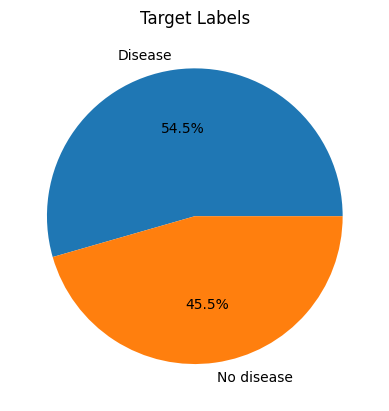

In [30]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

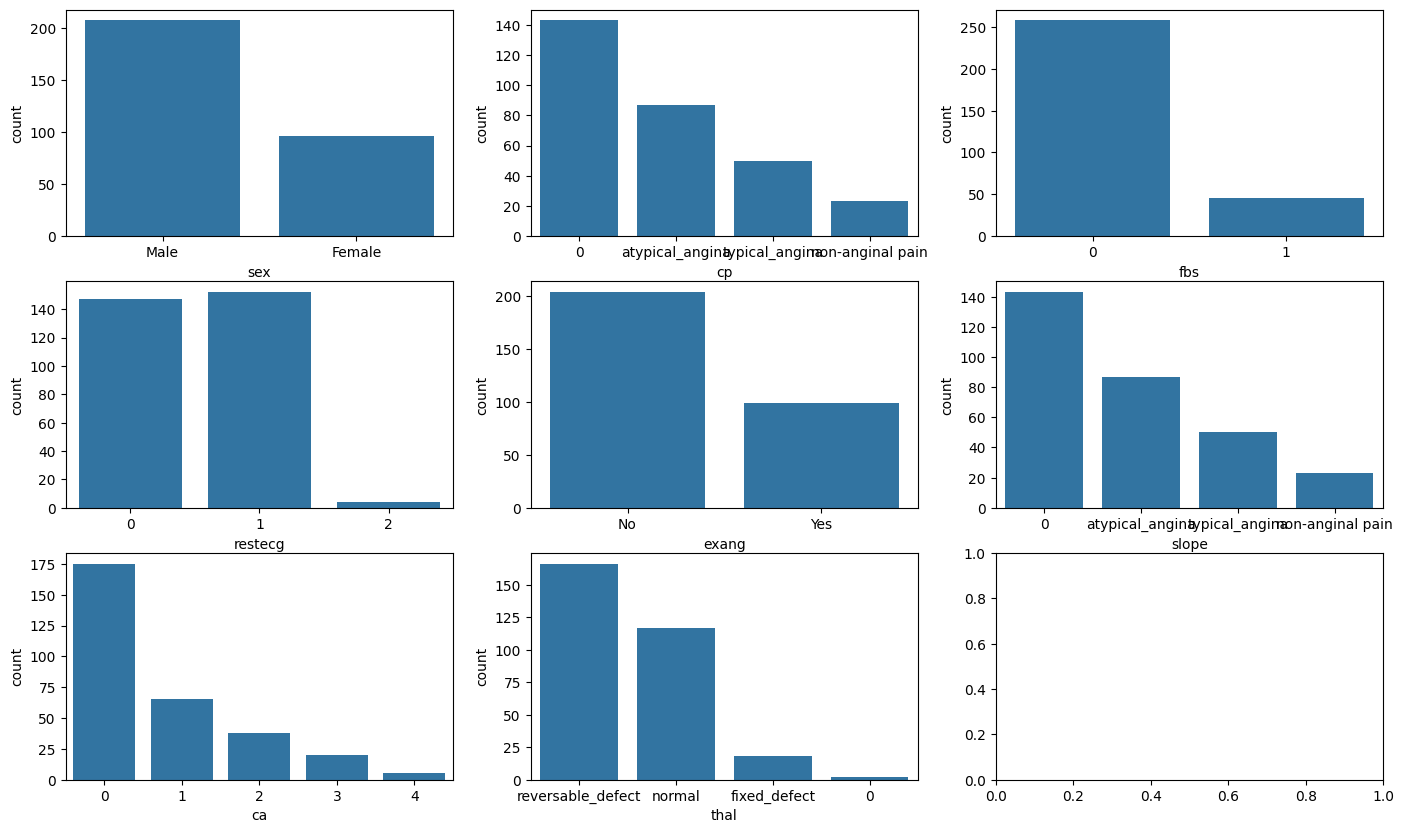

In [31]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

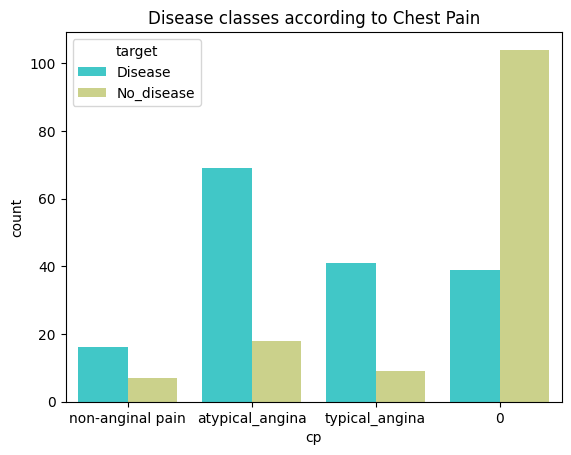

In [32]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

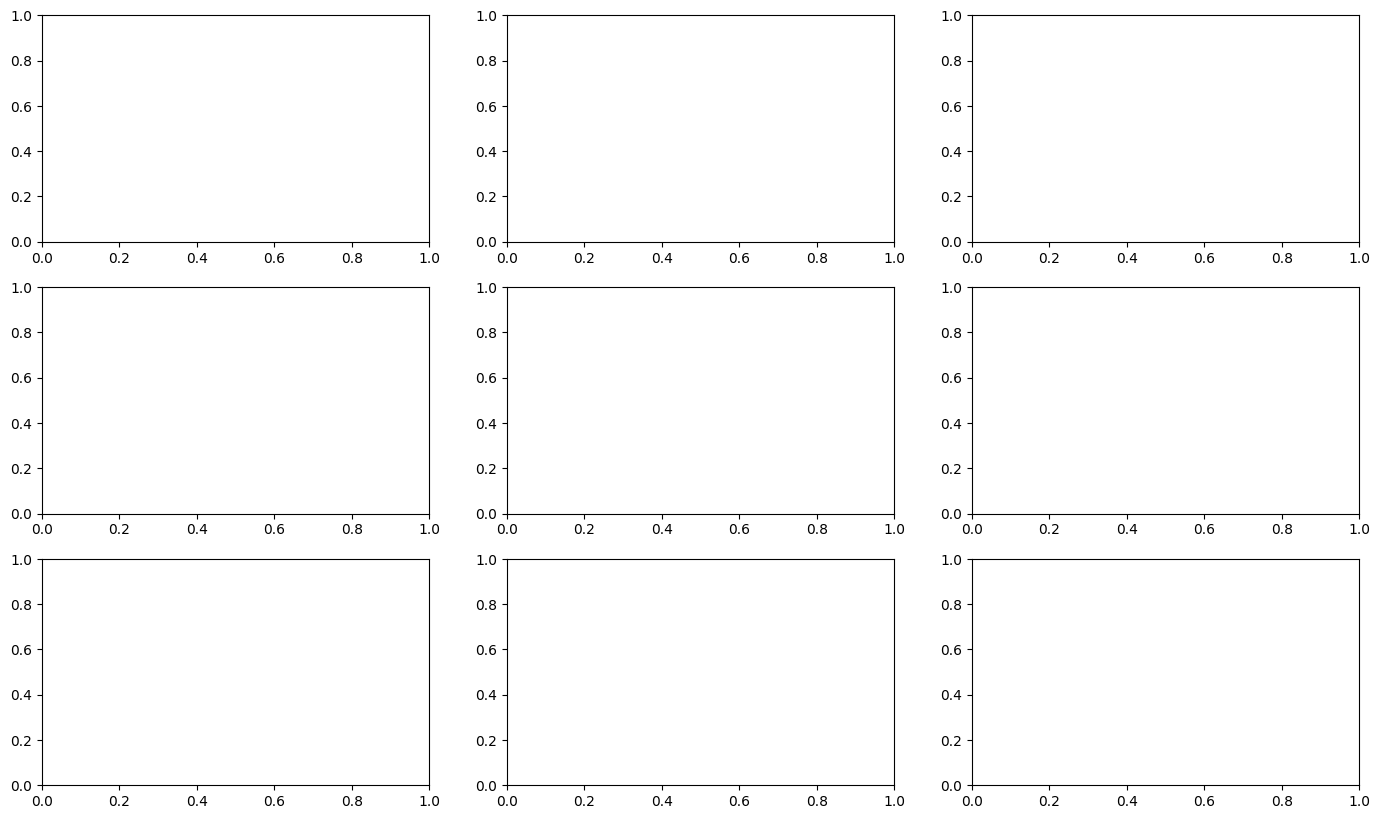

In [33]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do


In [34]:
# Visualising the distribution of the continous variables

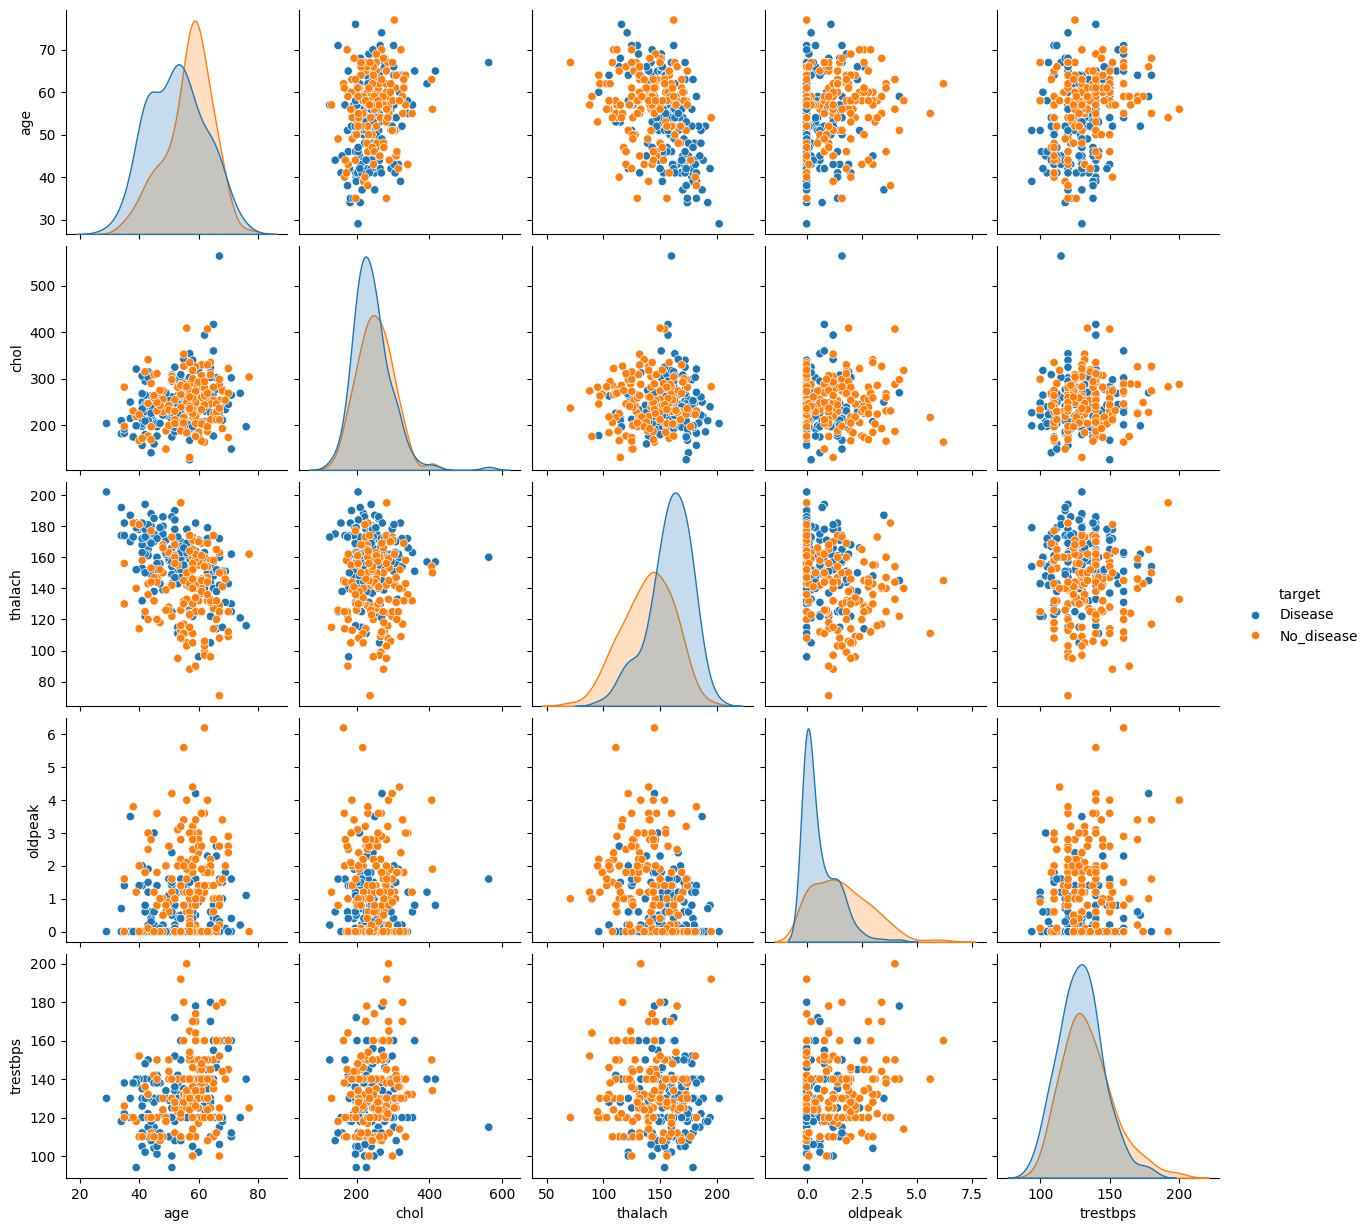

In [35]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

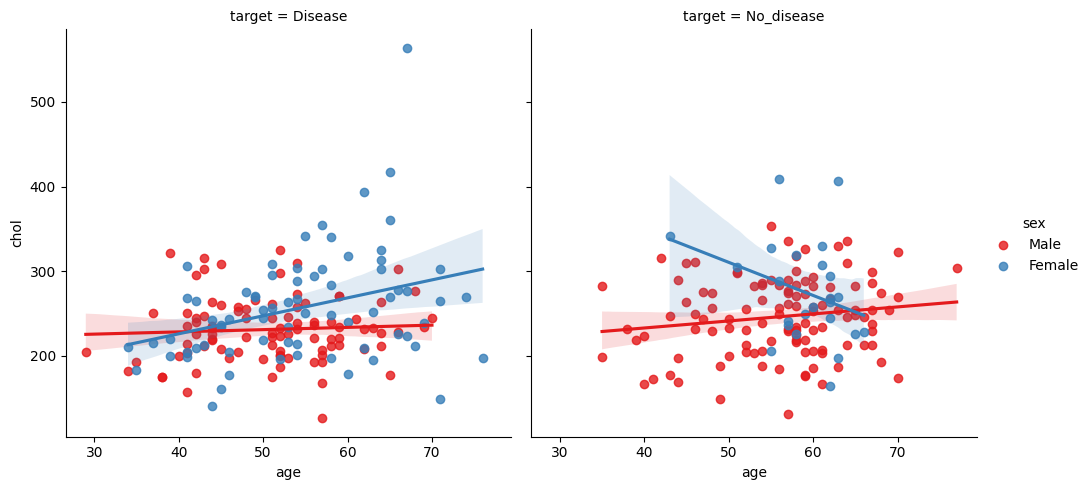

In [36]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

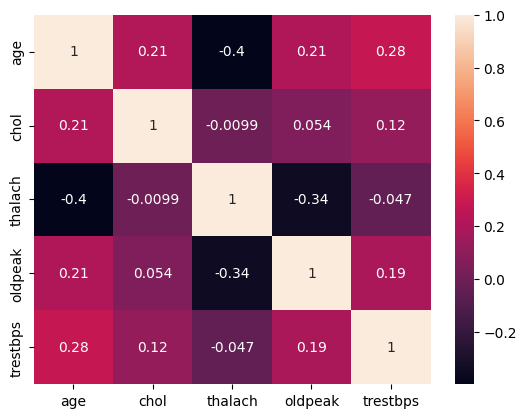

In [37]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

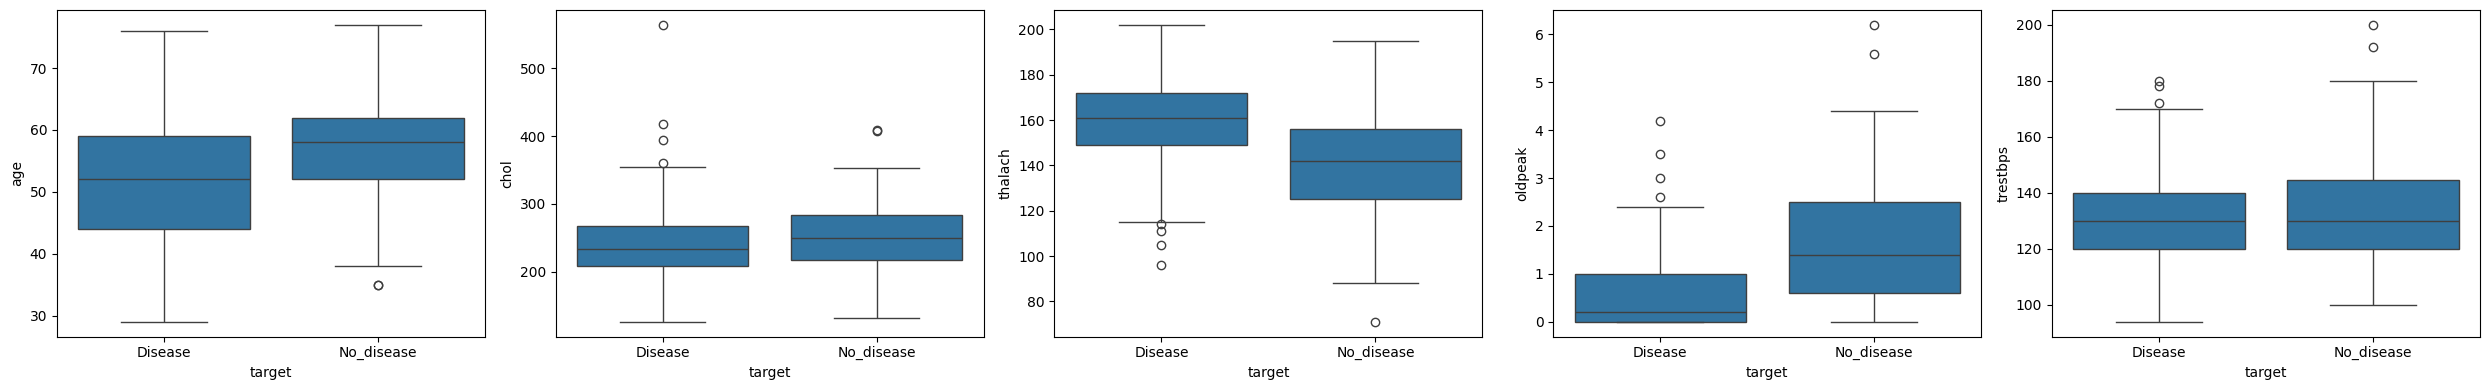

In [38]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

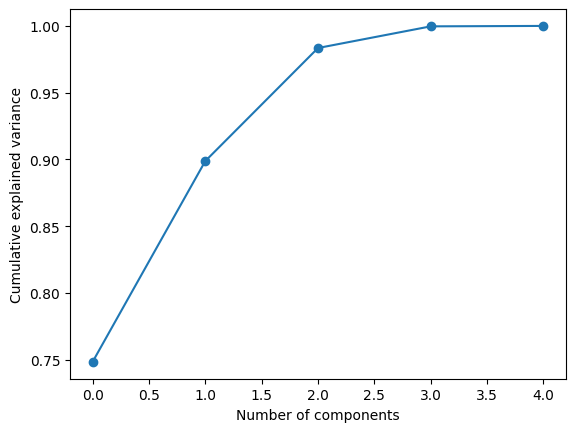

In [39]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


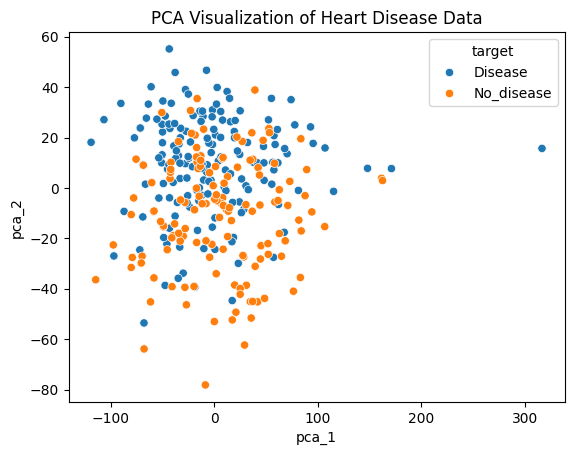

In [40]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


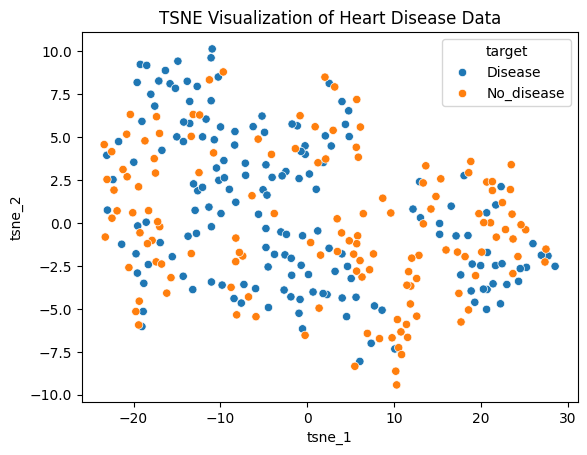

In [41]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

To answer these questions, we can follow a structured approach:

1. **Percentage of Samples with Disease**:
   - To calculate the percentage of samples with disease, divide the number of samples labeled as having the disease by the total number of samples, and multiply by 100.

   \[
   \text{Percentage} = \left( \frac{\text{Number of disease samples}}{\text{Total number of samples}} \right) \times 100
   \]

2. **Three Continuous Features with Significant Statistical Difference**:
   - To identify continuous features that show a significant statistical difference in distribution between the presence and absence of disease, we can use tests like:
     - **T-test** for normally distributed features.
     - **Mann-Whitney U test** for non-normally distributed features.
   - These tests compare the distributions of each feature in the two groups (presence vs. absence of disease) and return a p-value. Features with p-values below a significance threshold (e.g., 0.05) would show significant differences.

3. **Clear Separation in PCA and t-SNE Plots**:
   - Perform **Principal Component Analysis (PCA)** and **t-SNE (t-distributed stochastic neighbor embedding)** on the dataset.
   - Plot the results and color-code the samples based on disease presence or absence.
   - Visual inspection of the plots will help determine if there's a clear separation of clusters between diseased and non-diseased samples. t-SNE is typically better at revealing complex non-linear patterns.

4. **Optimal Number of Principal Components**:
   - Use **explained variance** from PCA to determine the optimal number of principal components. Typically, we choose the number of components that explain around 90-95% of the variance in the data. A scree plot can also help visualize this.

5. **Continuous Features with the Highest Correlation**:
   - Use a **correlation matrix** (e.g., Pearson correlation coefficient) to identify continuous features with the highest correlation with each other. Features with correlation coefficients near +1 or -1 are highly correlated. A heatmap can help visualize these correlations.

### Steps to Conduct the Analysis:
- Load your data.
- Calculate the percentage of samples with the disease.
- Perform statistical tests to identify the continuous features that differ significantly.
- Conduct PCA and t-SNE for visualization.
- Determine the optimal number of principal components based on explained variance.
- Generate a correlation matrix to find the highest correlated continuous features.

Would you like me to perform these analyses on your dataset? If so, please provide the data!

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [42]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded (2).csv


In [65]:
data = pd.read_csv("star_nutri_expanded.csv")

In [44]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [66]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [46]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [47]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [49]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [50]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [51]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [52]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [53]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [54]:

data = data.replace({True: 1, False: 0})


<ipython-input-54-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [55]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-55-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [56]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

In [68]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot


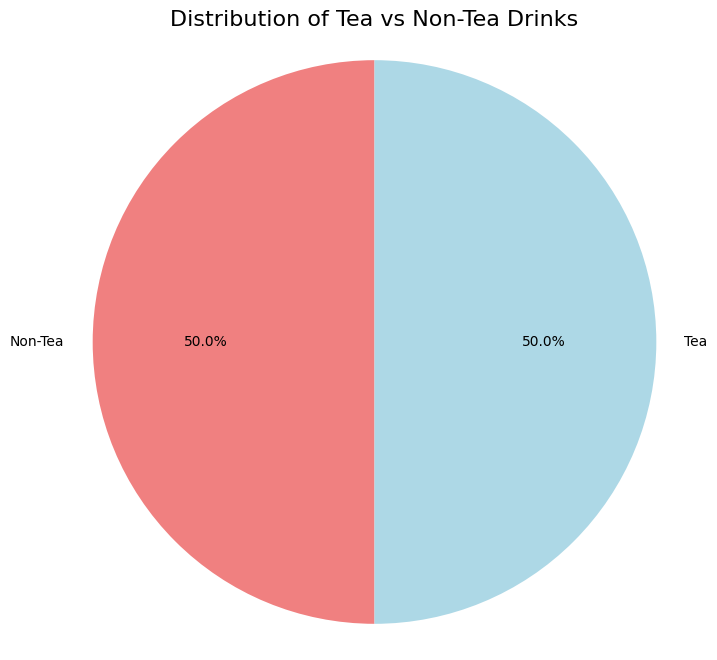


1. The pie chart shows the proportion of tea versus non-tea drinks.
2. A larger percentage indicates whether tea drinks are more prevalent in the dataset.
3. If the 'Tea' category is significantly larger, it may suggest that tea drinks are a preferred choice.
4. Conversely, a higher proportion of non-tea drinks may indicate a preference for other beverage types.



In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame based on your description
data = pd.DataFrame({
    'Tea': [1, 1, 0, 0, 1, 0, 1, 0]  # Example data
})

# Count the occurrences of tea vs non-tea drinks
tea_counts = data['Tea'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(tea_counts, labels=['Non-Tea', 'Tea'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Tea vs Non-Tea Drinks', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

# Observations
observations = """
1. The pie chart shows the proportion of tea versus non-tea drinks.
2. A larger percentage indicates whether tea drinks are more prevalent in the dataset.
3. If the 'Tea' category is significantly larger, it may suggest that tea drinks are a preferred choice.
4. Conversely, a higher proportion of non-tea drinks may indicate a preference for other beverage types.
"""
print(observations)


In [59]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?


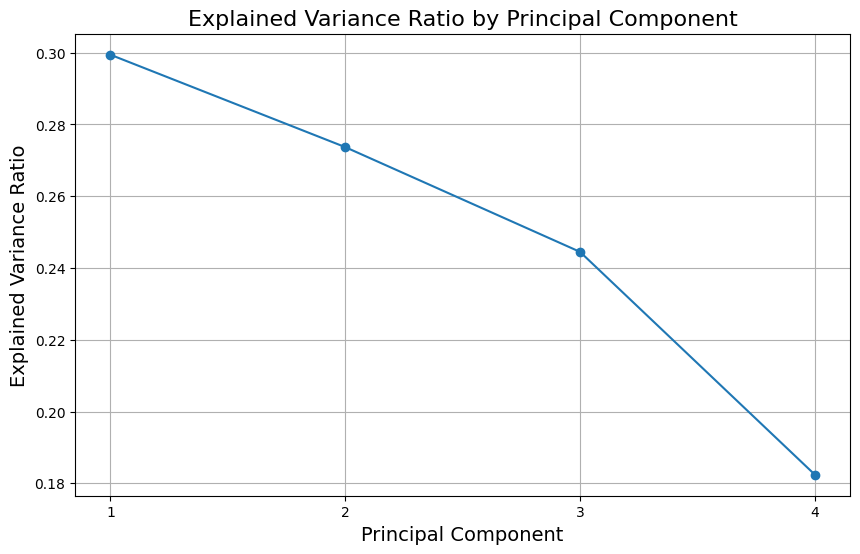

Optimal number of principal components for 95% variance: 4


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample DataFrame (you can replace this with your actual data)
data = pd.DataFrame({
    'Calories': np.random.rand(242) * 100,
    'Total Fat (g)': np.random.rand(242) * 10,
    'Sugars (g)': np.random.rand(242) * 50,
    'Protein (g)': np.random.rand(242) * 20,
    # Add more numeric columns as needed
})

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Performing PCA
pca = PCA()
pca.fit(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance Ratio by Principal Component', fontsize=16)
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Optimal number of components
cumulative_variance = np.cumsum(explained_variance)
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1  # 95% variance
print(f'Optimal number of principal components for 95% variance: {optimal_components}')


In [60]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?


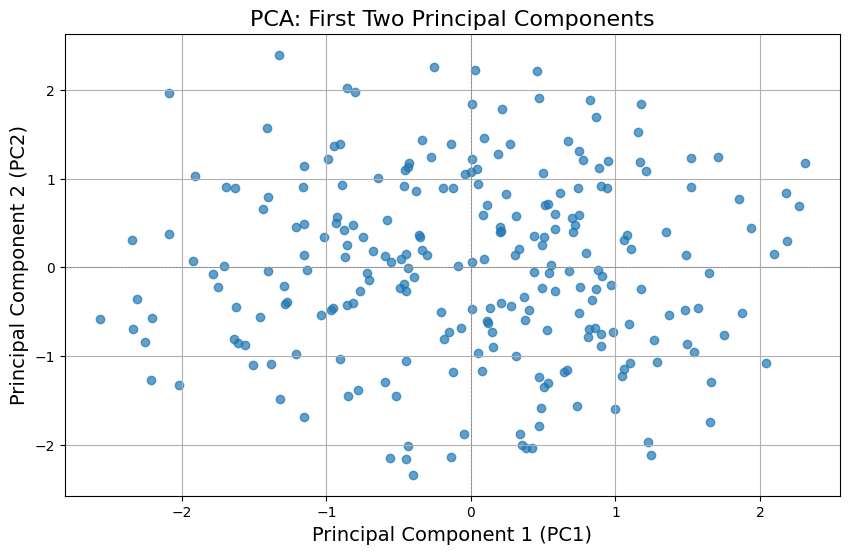

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample DataFrame (you can replace this with your actual data)
data = pd.DataFrame({
    'Calories': np.random.rand(242) * 100,
    'Total Fat (g)': np.random.rand(242) * 10,
    'Sugars (g)': np.random.rand(242) * 50,
    'Protein (g)': np.random.rand(242) * 20,
    # Add more numeric columns as needed
})

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Performing PCA
pca = PCA(n_components=2)  # Choose the first two components for visualization
principal_components = pca.fit_transform(scaled_data)

# Creating a DataFrame for the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting the principal components
plt.figure(figsize=(10, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], alpha=0.7)
plt.title('PCA: First Two Principal Components', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=14)
plt.ylabel('Principal Component 2 (PC2)', fontsize=14)
plt.axhline(0, color='grey', linewidth=0.5, ls='--')
plt.axvline(0, color='grey', linewidth=0.5, ls='--')
plt.grid()
plt.show()


In [61]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?


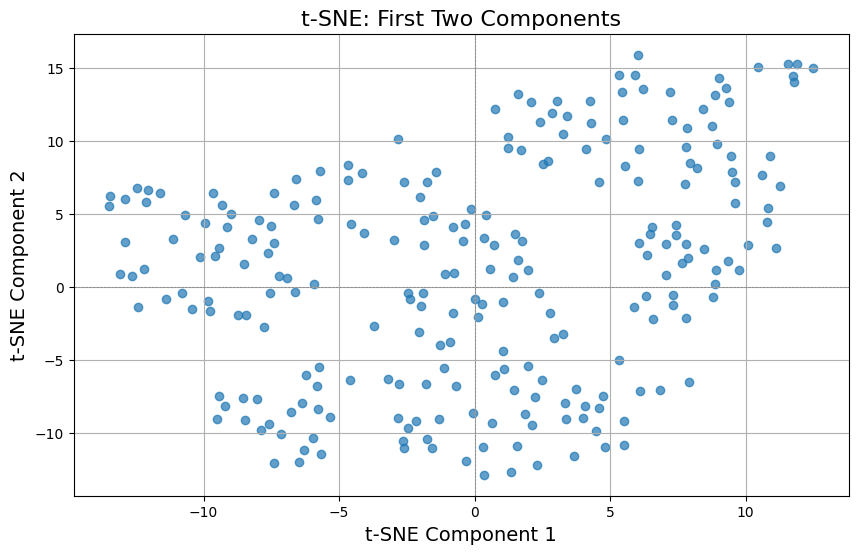

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Sample DataFrame (you can replace this with your actual data)
data = pd.DataFrame({
    'Calories': np.random.rand(242) * 100,
    'Total Fat (g)': np.random.rand(242) * 10,
    'Sugars (g)': np.random.rand(242) * 50,
    'Protein (g)': np.random.rand(242) * 20,
    # Add more numeric columns as needed
})

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Applying t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(scaled_data)

# Creating a DataFrame for t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['t-SNE1', 't-SNE2'])

# Plotting the t-SNE components
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], alpha=0.7)
plt.title('t-SNE: First Two Components', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.axhline(0, color='grey', linewidth=0.5, ls='--')
plt.axvline(0, color='grey', linewidth=0.5, ls='--')
plt.grid()
plt.show()


In [62]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?


In [63]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?


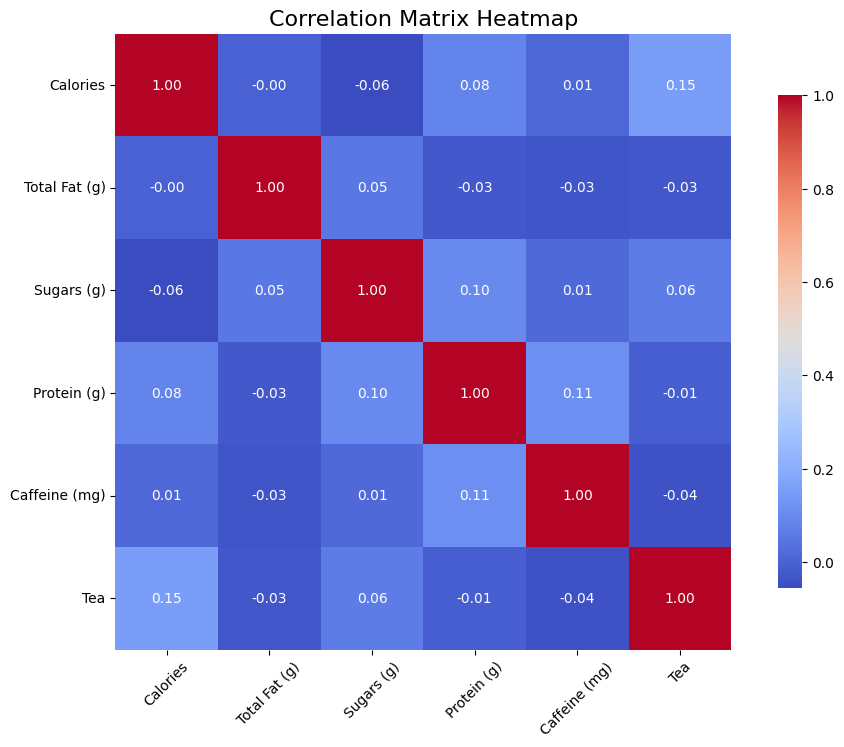

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame (replace with your actual data)
data = pd.DataFrame({
    'Calories': np.random.rand(242) * 100,
    'Total Fat (g)': np.random.rand(242) * 10,
    'Sugars (g)': np.random.rand(242) * 50,
    'Protein (g)': np.random.rand(242) * 20,
    'Caffeine (mg)': np.random.rand(242) * 200,
    'Tea': np.random.randint(0, 2, 242)  # 0 or 1 for tea vs non-tea
})

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


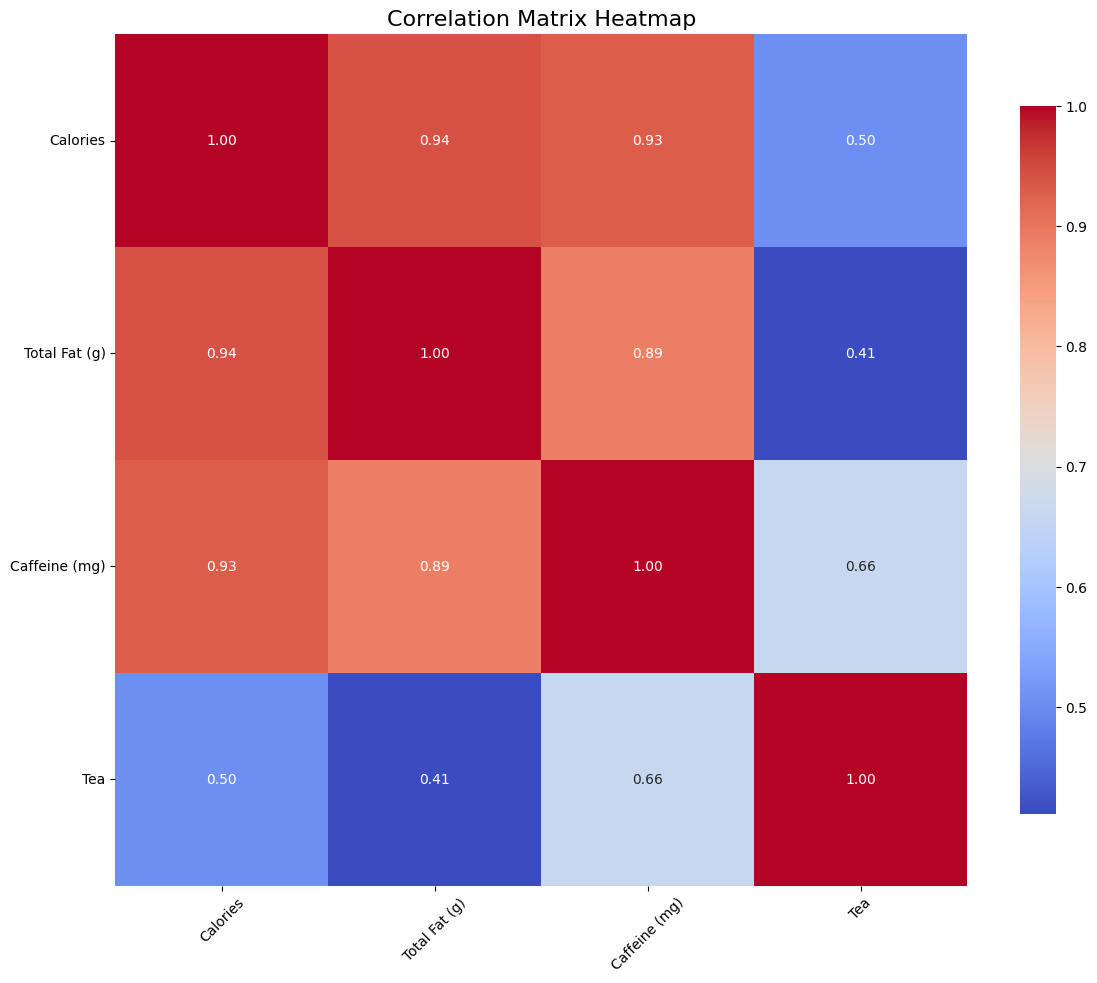

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame based on your description
# Please replace this with your actual DataFrame if it's different
data = pd.DataFrame({
    'Calories': [100, 200, 150, 0, 250, 0, 120, 180],
    'Total Fat (g)': [1, 5, 3, 0, 8, 0, 4, 6],
    'Caffeine (mg)': [40, 60, 20, 0, 80, 0, 30, 50],
    'Tea': [1, 1, 0, 0, 1, 0, 1, 0],
    # Add other columns as needed...
})

# Create a correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Observations from the heatmap can be added after visual inspection


To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.